Varun Bansode Roll-no.:7 Moodle-id:22102110

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Model: Revenue = 10.00 * Temperature + -0.00


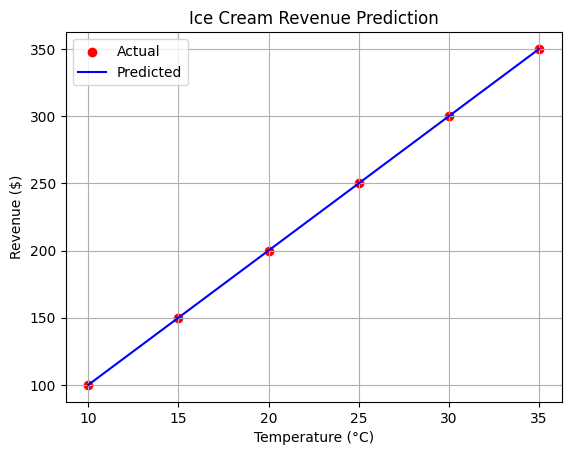

In [ ]:

temperature = np.array([10, 15, 20, 25, 30, 35]).reshape(-1, 1)
revenue = np.array([100, 150, 200, 250, 300, 350])

model = LinearRegression()
model.fit(temperature, revenue)

predicted = model.predict(temperature)

print("Model: Revenue = {:.2f} * Temperature + {:.2f}".format(model.coef_[0], model.intercept_))

plt.scatter(temperature, revenue, color='red', label='Actual')
plt.plot(temperature, predicted, color='blue', label='Predicted')
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue ($)")
plt.title("Ice Cream Revenue Prediction")
plt.legend()
plt.grid()
plt.show()


In [ ]:

data = {
    'R&D Spend': [165349.2, 162597.7, 153441.51],
    'Administration': [136897.8, 151377.59, 101145.55],
    'Marketing Spend': [471784.1, 443898.53, 407934.54],
    'State': ['New York', 'California', 'Florida'],
    'Profit': [192261.83, 191792.06, 191050.39]
}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

model2 = LinearRegression()
model2.fit(X, y)

predicted_profit = model2.predict(X)
print("Predicted Profit:", predicted_profit)


Predicted Profit: [192261.83 191792.06 191050.39]


    Temperature     Revenue
0     24.566884  534.799028
1     26.005191  625.190122
2     27.790554  660.632289
3     20.595335  487.706960
4     11.503498  316.240194
..          ...         ...
95     9.018860  212.591740
96    20.265012  474.749392
97    19.363153  460.402500
98    14.685944  343.362905
99     9.954357  283.834327

[100 rows x 2 columns]
       Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None


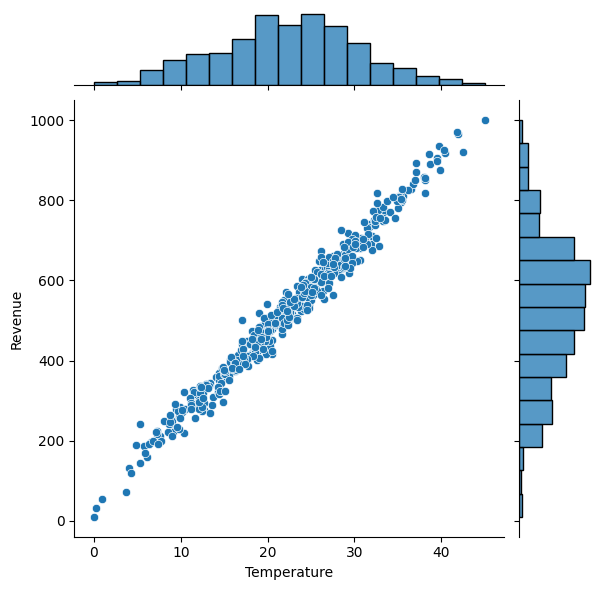

Linear Model Coefficient (m): [21.40860109]
Linear Model Coefficient (b): 45.03725133480697


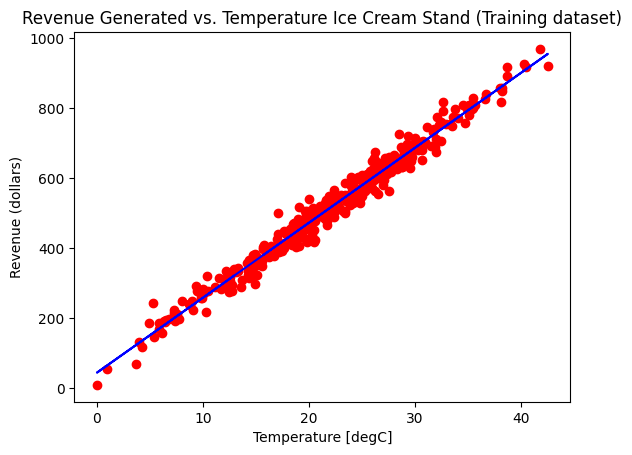

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

IceCream = pd.read_csv('/content/Copy_of_IceCream.csv')

print(IceCream.head(100))
print(IceCream.describe())
print(IceCream.info())
sns.jointplot(x='Temperature', y='Revenue', data=IceCream)
plt.show()

y = IceCream['Revenue']
X = IceCream[['Temperature']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

print("Linear Model Coefficient (m):", regressor.coef_)
print("Linear Model Coefficient (b):", regressor.intercept_)

y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.ylabel('Revenue (dollars)')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature Ice Cream Stand (Training dataset)')
plt.show()

**Exercise 2:**

Predict the total fare amount of a Chicago taxi trip based on trip distance and duration using a Linear
Regression model

Columns in dataset: Index(['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_START_HOUR',
       'TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED', 'PICKUP_CENSUS_TRACT',
       'DROPOFF_CENSUS_TRACT', 'PICKUP_COMMUNITY_AREA',
       'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS',
       'TRIP_TOTAL', 'PAYMENT_TYPE', 'COMPANY'],
      dtype='object')
Linear Model Coefficients: [2.04 0.  ]
Linear Model Intercept: 3.8696581083307144

Predicted vs Actual Fare Amounts:
[[29.05 29.5 ]
 [32.41 33.  ]
 [30.28 29.75]
 ...
 [21.69 24.35]
 [ 6.06  5.5 ]
 [47.53 47.75]]

R-squared Score: 0.9518236761479035


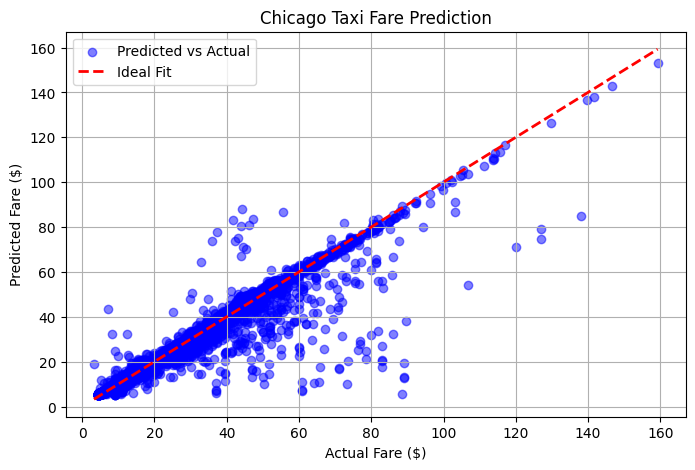

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

ds = pd.read_csv('/content/chicago_taxi_train.csv')

print("Columns in dataset:", ds.columns)

X = ds[['TRIP_MILES', 'TRIP_SECONDS']]
y = ds['FARE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Linear Model Coefficients:", regressor.coef_)
print("Linear Model Intercept:", regressor.intercept_)

y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)

print("\nPredicted vs Actual Fare Amounts:")
print(np.concatenate((y_pred.reshape(-1, 1), y_test.values.reshape(-1, 1)), axis=1))

print("\nR-squared Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.title("Chicago Taxi Fare Prediction")
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.legend()
plt.grid(True)
plt.show()


**Exercise 1**:

You work in the real estate sector and you would like to create a model that could predict the
selling price of a property based on its area in square feet. You decide that a Linear Regression
model might be a good candidate to solve this problem.
Data set:
 Independent variable X: Area of the property (in square feet)
 Dependent variable Y: Selling price of the property (in dollars)

   Area    Price
0   400  2700000
1   425  2837500
2   450  2975000
3   475  3112500
4   500  3250000
Linear Model Coefficient (slope): 5500.0
Linear Model Intercept: 500000.0


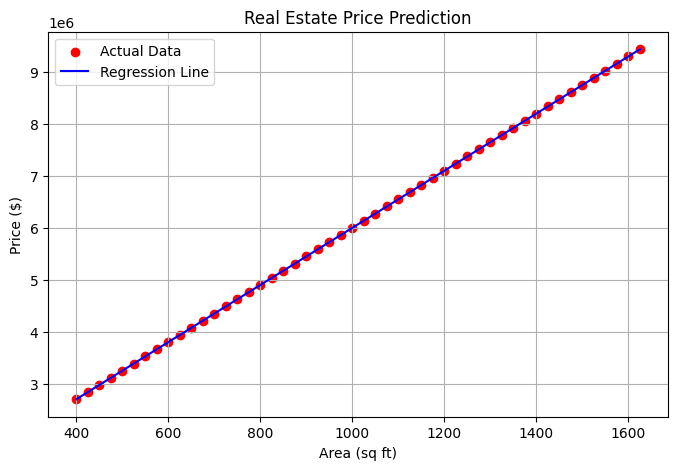

R-squared Score: 1.0

Predicted price for 1800 sq ft: $10,400,000.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

data = pd.read_csv('/content/Estate.csv')
print(data.head())
X = data[['Area']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Linear Model Coefficient (slope):", regressor.coef_[0])
print("Linear Model Intercept:", regressor.intercept_)

y_pred = regressor.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, regressor.predict(X), color='blue', label='Regression Line')
plt.title('Real Estate Price Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

print("R-squared Score:", r2_score(y_test, y_pred))

custom_area = [[1800]]
predicted_price = regressor.predict(custom_area)
print(f"\nPredicted price for 1800 sq ft: ${predicted_price[0]:,.2f}")
